In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
#read into a data frame the data
moviesdf = pd.read_csv("./movies.csv",na_values='NA', keep_default_na=False , encoding = "ISO-8859-1")

### Ejercicio 4

##responder las pregunas

In [3]:
moviesdf['budget'] = pd.to_numeric(moviesdf['budget'], errors='coerce')
top_budget_movies = moviesdf.sort_values(by="budget", ascending=False, na_position="last")
top_10_budget_movies = top_budget_movies[['title', 'budget']].head(10)
print(top_10_budget_movies)



                                            title     budget
716   Pirates of the Caribbean: On Stranger Tides  380000000
4710                      Avengers: Age of Ultron  365000000
5952                            Avengers: Endgame  356000000
4953                               Justice League  300000000
5953                       Avengers: Infinity War  300000000
163      Pirates of the Caribbean: At World's End  300000000
607                              Superman Returns  270000000
7134                                The Lion King  260000000
3791                                      Tangled  260000000
280                                  Spider-Man 3  258000000


Ejercicio 4.2

In [4]:
moviesdf['revenue'] = pd.to_numeric(moviesdf['revenue'], errors='coerce')
top_revenue_movies = moviesdf.sort_values(by="revenue", ascending=False, na_position="last")
top_10_revenue_movies = top_revenue_movies[['title', 'revenue']].head(10)
print(top_10_revenue_movies)


                             title       revenue
3210                        Avatar  2.847246e+09
5952             Avengers: Endgame  2.797801e+09
307                        Titanic  2.187464e+09
4947  Star Wars: The Force Awakens  2.068224e+09
5953        Avengers: Infinity War  2.046240e+09
4914                Jurassic World  1.671713e+09
7134                 The Lion King  1.667635e+09
9049       Spider-Man: No Way Home  1.631853e+09
3397                  The Avengers  1.518816e+09
5087                     Furious 7  1.515048e+09


Ejercicio 4.3

In [5]:
moviesdf['voteCount'] = pd.to_numeric(moviesdf['voteCount'], errors='coerce')
top_voted_movie = moviesdf.sort_values(by="voteCount", ascending=False, na_position="last")
top_voted_movie = top_voted_movie[['title', 'voteCount']].head(1)
print(top_voted_movie)

          title  voteCount
3511  Inception      30788


Ejercicico 4.4

In [6]:
moviesdf['voteAvg'] = pd.to_numeric(moviesdf['voteAvg'], errors='coerce')
moviesdf['voteCount'] = pd.to_numeric(moviesdf['voteCount'], errors='coerce')
pelisfiltradas = moviesdf[moviesdf['voteCount'] > 1000]#es para que la calidad de los datos sea significativa
peorcalificada = pelisfiltradas.sort_values(by="voteAvg", ascending=True)
peorcalificada = peorcalificada[['title', 'voteAvg', 'voteCount']].head(1)
print(peorcalificada)


                     title  voteAvg  voteCount
2766  Dragonball Evolution      2.8       1600


Ejercicio 4.5

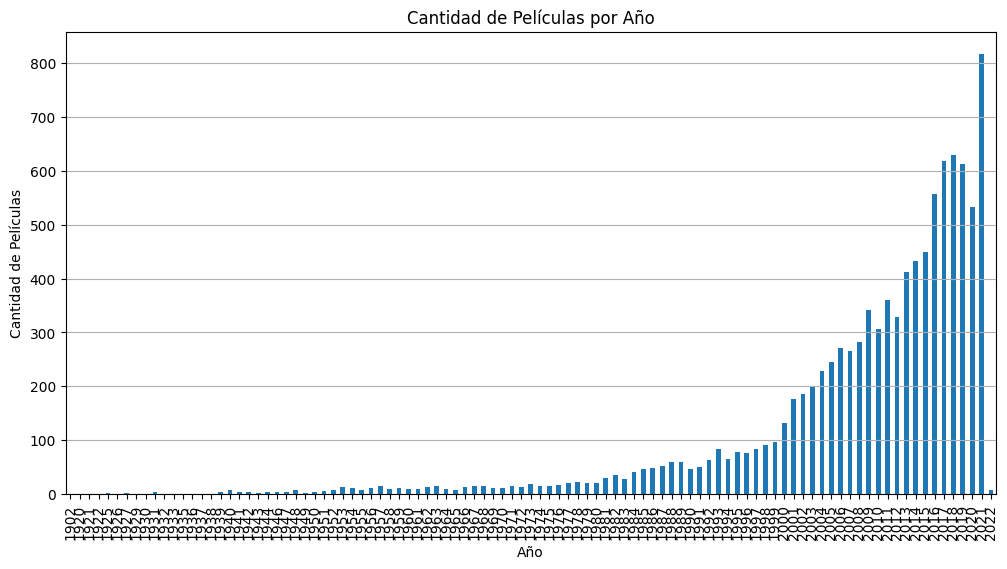

(2021, 816)

In [9]:
# formato de date
moviesdf['releaseDate'] = pd.to_datetime(moviesdf['releaseDate'], errors='coerce')

# Para obtener el año y la fecha de lanzamiento 
moviesdf['year'] = moviesdf['releaseDate'].dt.year
pd.set_option('display.max_rows', None)

# Contar películas por año
pelispora = moviesdf['year'].value_counts().sort_index()
maspelis = pelispora.idxmax()
maspelis_contador = pelispora.max()

# Imprimir cuántas películas se hicieron cada año
print("Number of movies every year :")
print(pelispora)
print("\nYear with more movies:")
print(f"year: {maspelis}, movies: {maspelis_contador}")
#gráfico de barras
plt.figure(figsize=(12, 6))
pelispora.plot(kind='bar')
plt.title('Cantidad de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.grid(axis='y')
plt.show()

maspelis, maspelis_contador






Ejercicio 4.6

In [ ]:
if 'genres_list' not in moviesdf.columns:
    moviesdf['genres_list'] = moviesdf['genres'].str.split('|')


most_recent_movies = moviesdf.sort_values(by='releaseDate', ascending=False).head(20)
most_recent_movies_clean = most_recent_movies.dropna(subset=['genres_list'])

# Contando la frecuencia de géneros en las 20 películas más recientes
recent_genre_counts_clean = Counter(genre for genres in most_recent_movies_clean['genres_list'] for genre in genres)

# Limpieza de datos para todo el conjunto de películas
all_movies_clean = moviesdf.dropna(subset=['genres_list'])

# Contando la frecuencia de géneros en todo el conjunto de datos
overall_genre_counts_clean = Counter(genre for genres in all_movies_clean['genres_list'] for genre in genres)

# Gráfico para las 20 películas más recientes
plt.figure(figsize=(10, 5))
plt.bar(recent_genre_counts_clean.keys(), recent_genre_counts_clean.values(), color='blue')
plt.title('Frecuencia de Géneros en las 20 Películas Más Recientes')
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico para todo el conjunto de datos
plt.figure(figsize=(10, 5))
plt.bar(overall_genre_counts_clean.keys(), overall_genre_counts_clean.values(), color='green')
plt.title('Frecuencia de Géneros en Todo el Conjunto de Datos')
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()





Ejercicio 4.7

In [ ]:

moviesdf = pd.read_csv('movies.csv', encoding="ISO-8859-1", na_values='NA', keep_default_na=False)
moviesdf['genres_list'] = moviesdf['genres'].str.split('|')
moviesdf['profit'] = moviesdf['revenue'] - moviesdf['budget']


expanded_genres_df = moviesdf.explode('genres_list')
expanded_genres_df.rename(columns={'genres_list': 'genre'}, inplace=True)


genre_profit_sums = expanded_genres_df.groupby('genre')['profit'].sum()
sorted_genres_by_profit = genre_profit_sums.sort_values(ascending=False)


print("Genero principal con mayores ganancias:", sorted_genres_by_profit.idxmax(), 
      "con una ganancia total de:", sorted_genres_by_profit.max())

